AttributeError: 'Image' object has no attribute 'shape'

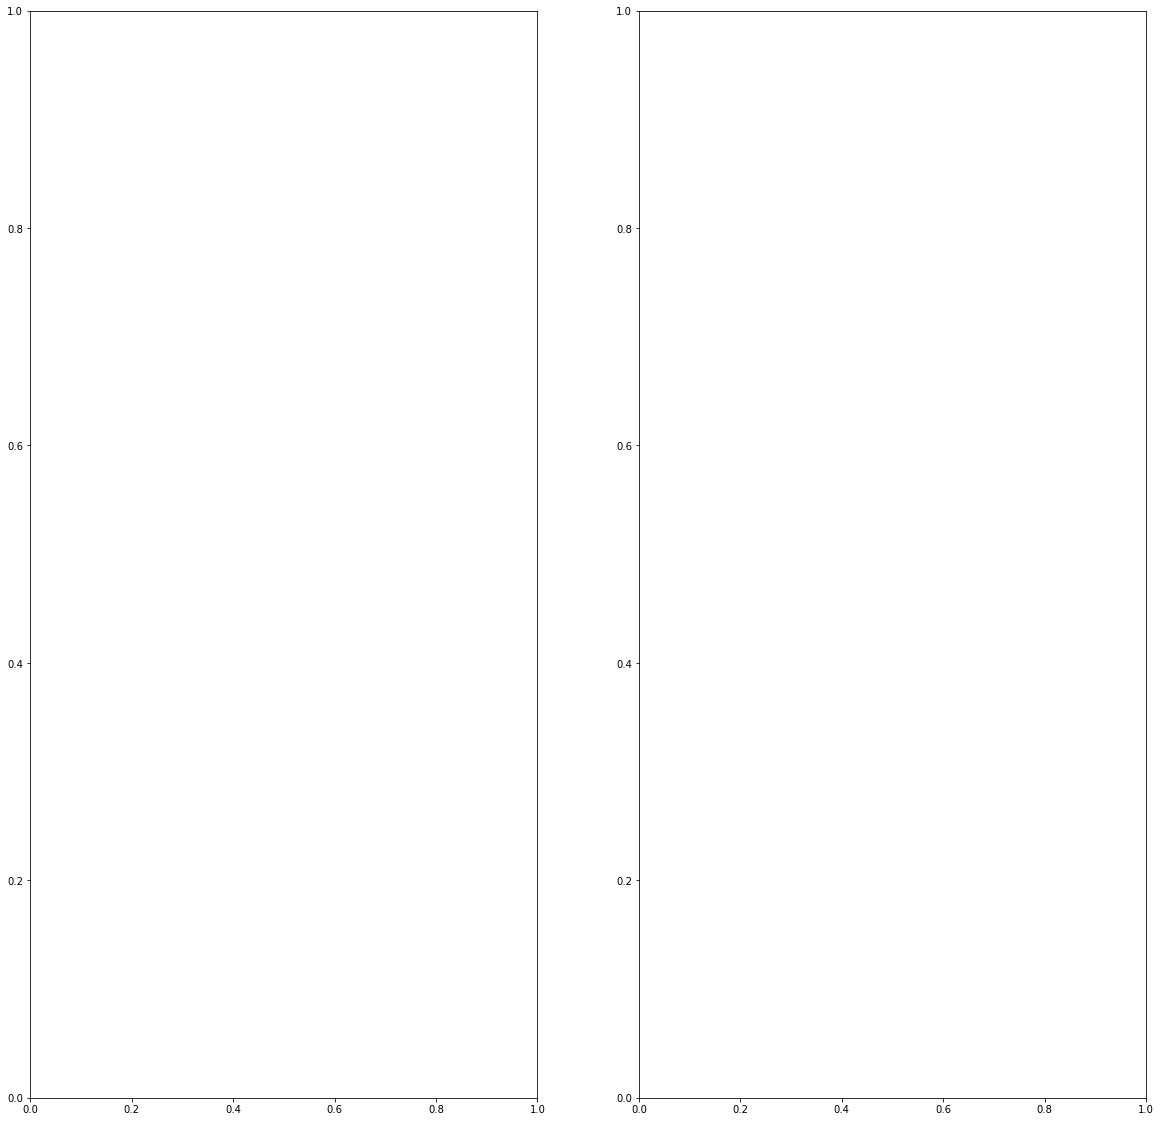

In [10]:
# This is Saleh

from PIL import Image
from PIL import ImageOps

img = Image.open('results_L3.jpg')
#img = ImageOps.grayscale(im)
# img.save('greyscale.png')

import imageio

import matplotlib.pyplot as plt

import scipy.ndimage as ndimage



w, h = img.size
   
# Setting the points for cropped image 
left = 0
top = 0
right = w
bottom = h/3
  

img_1 = img.crop((left, top, right, bottom)) 

left = 0
top = h/3
right = w
bottom = 2*h/3
  

img_2 = img.crop((left, top, right, bottom))  


left = 0
top = 2*h/3
right = w
bottom = h-40
  

img_3 = img.crop((left, top, right, bottom)) 
# Shows the image in image viewer 
#img1.show() 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 20))

#ax1.imshow(img_1, cmap='gray')
#ax2.imshow(img_2, cmap='gray')
#ax3.imshow(img_3, cmap='gray')



img_3.save('lowest_row.png')


import sys
import numpy as np
import skimage.color
import skimage.draw
import skimage.filters
import skimage.io
import skimage.viewer

#filename = 'lowest_row.png'
#image = skimage.io.imread(fname=filename)

image = img_3
# create a circular mask to select the 7th well in the first row

mask = np.zeros(shape=image.shape[0:2], dtype="bool")

r0=100
c0=200
circle = skimage.draw.circle(r0, c0, radius=95, shape=image.shape[:2])
mask[circle] = 1

# just for display:
# make a copy of the image, call it masked_image, and
# use np.logical_not() and indexing to apply the mask to it

masked_img = image[:]
masked_img[np.logical_not(mask)] = 0


ax1.imshow(img_3, cmap='gray')
ax2.imshow(masked_img, cmap='gray')


